# Przetwarzanie Grafiki i Muzyki - laboratorium nr 5

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Zadanie 1 (2 punkty)

Wygeneruj sygnał w kształcie funkcji sinus. Następnie dodaj do niego szumy:

  * Gaussowski: $N\left(0,0.5^2\right)$
  * Jednostajny: $U\left(-0.5,0.5\right)$
  * Sól i pieprz
  
Oraz wykonaj na nich filtry:

  * Średniej ruchomej
  * Medianowy

Wygeneruj 3 zestawy rysunków - na każdym z nich przedstaw wykres sinusa, sinusa z dodanym szumem oraz zaaplikowanymi filtracjami. Napisz, które filtry radzą sobie dobrze z podanymi typami zakłóceń. Dodaj legendę.

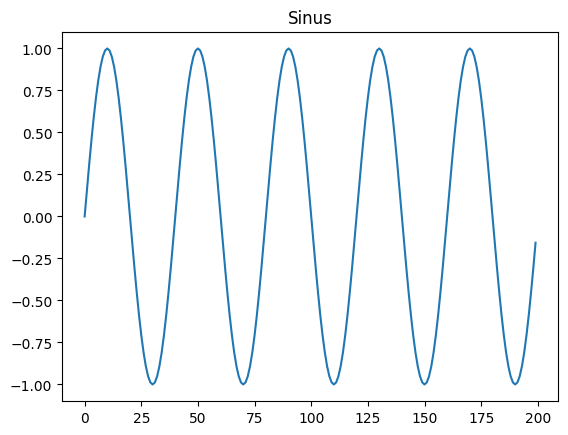

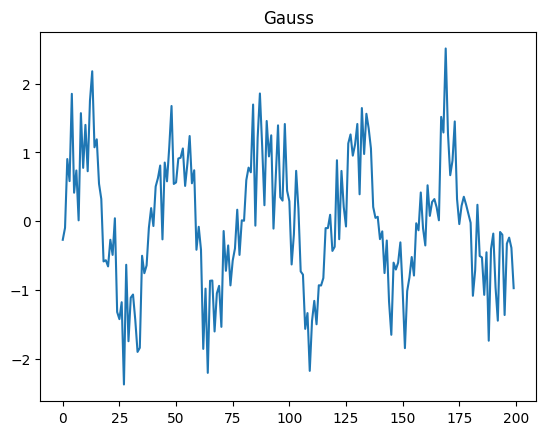

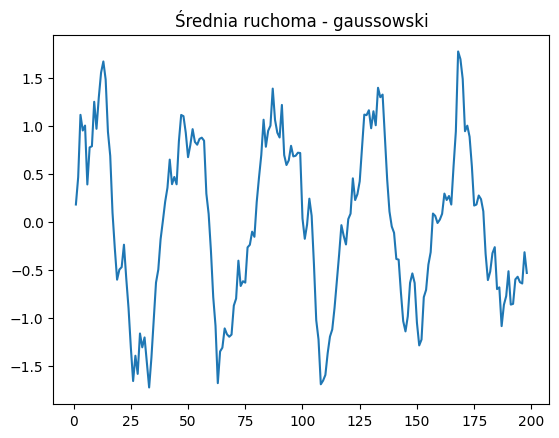

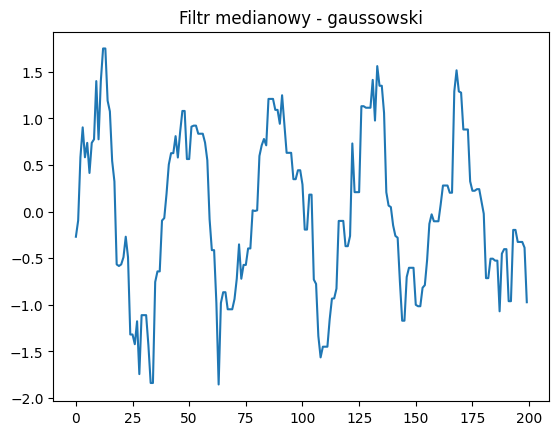

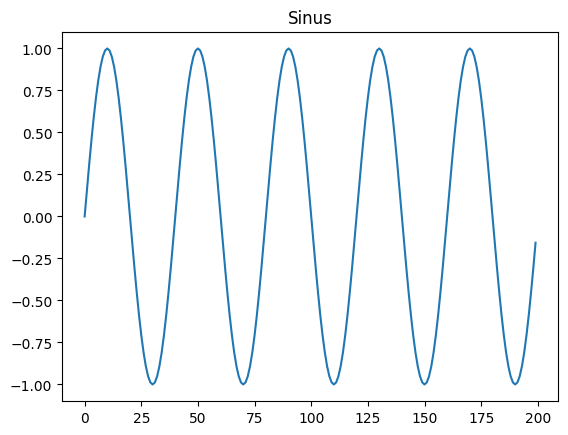

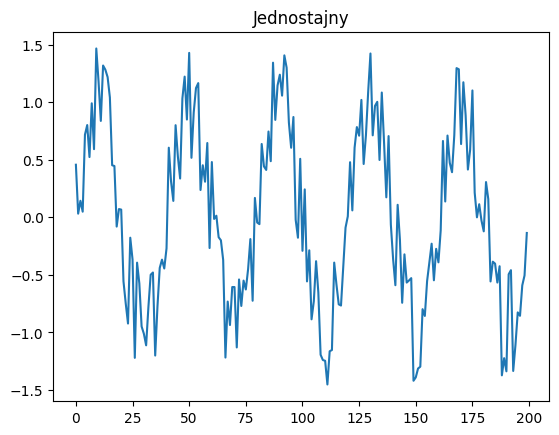

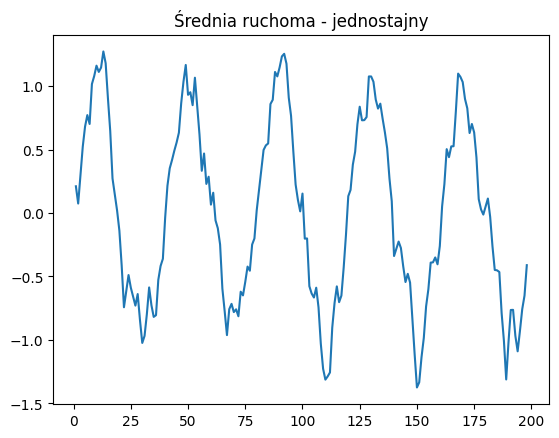

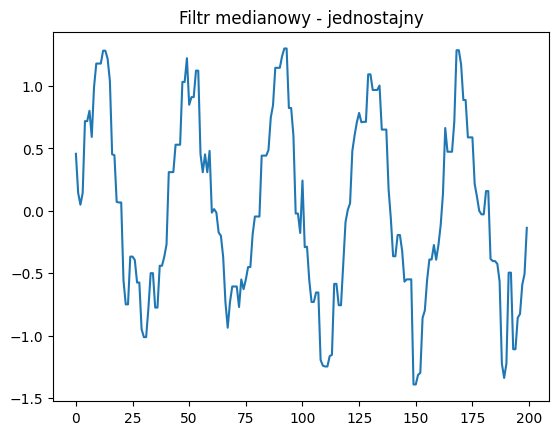

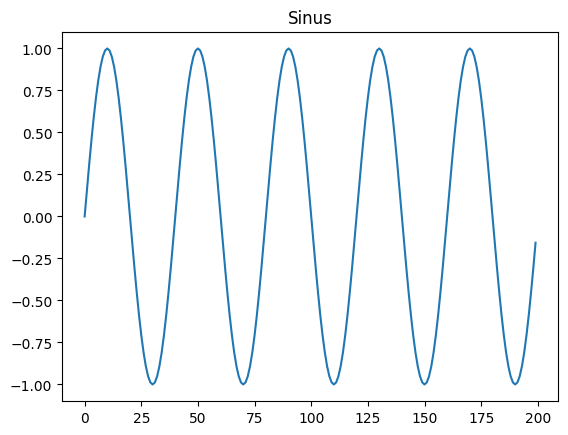

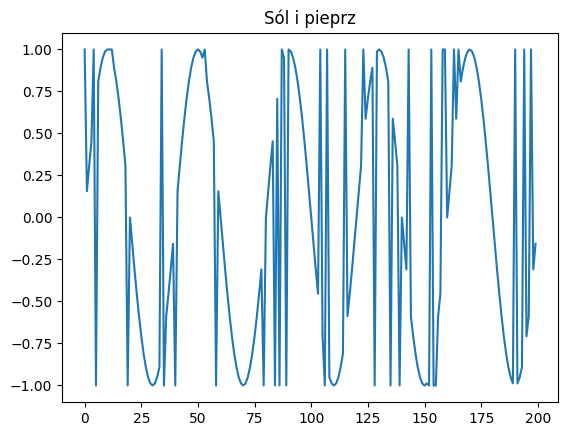

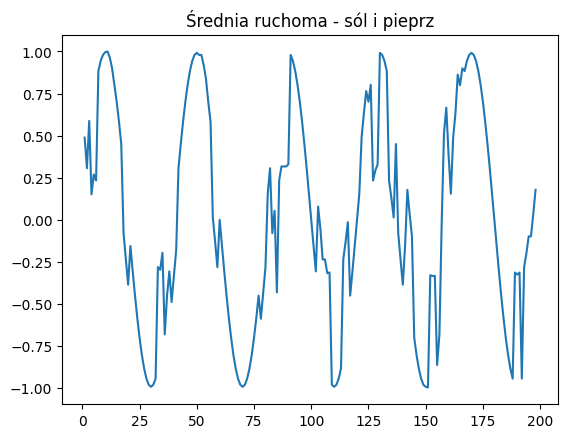

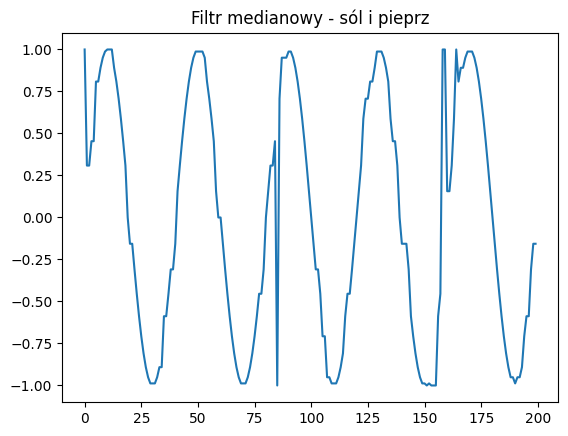

In [2]:
x = np.arange(0.0, 200.0, 1)
y = np.sin(2 * np.pi * x * 5 / 200)

def moving_average(dataset, window_size=3):
    result = []
    for i in range(len(dataset) - window_size + 1):
        window = dataset[i : i + window_size]
        window_average = sum(window) / window_size
        result.append(window_average)
    return result

def medfilt(x, k=3):
    k2 = (k - 1) // 2
    y = np.zeros ((len (x), k), dtype=x.dtype)
    y[:,k2] = x
    for i in range (k2):
        j = k2 - i
        y[j:,i] = x[:-j]
        y[:j,i] = x[0]
        y[:-j,-(i+1)] = x[j:]
        y[-j:,-(i+1)] = x[-1]
    return np.median(y, axis=1)


def gauss_noise():
    #sinus
    plt.plot(x, y)
    plt.title('Sinus')
    plt.show()

    noise = np.random.normal(0, 0.5, 200)
    #sinus + szum gaussowski
    plt.plot(x, y + noise)
    plt.title("Gauss")
    plt.show()

    plt.plot(x[1:199], moving_average(y + noise))
    plt.title("Średnia ruchoma - gaussowski")
    plt.show()

    plt.plot(x, medfilt(y + noise))
    plt.title("Filtr medianowy - gaussowski")
    plt.show()

def uniform_noise():
    #sinus
    plt.plot(x, y)
    plt.title('Sinus')
    plt.show()
    #sinus + szum jednostajny
    noise = np.random.uniform(-0.5, 0.5, 200)
    plt.plot(x, y + noise)
    plt.title('Jednostajny')
    plt.show()

    plt.plot(x[1:199], moving_average(y + noise))
    plt.title("Średnia ruchoma - jednostajny")
    plt.show()

    plt.plot(x, medfilt(y + noise))
    plt.title("Filtr medianowy - jednostajny")
    plt.show()

def salt_and_pepper_noise():
    #sinus
    plt.plot(x, y)
    plt.title('Sinus')
    plt.show()
    #sinus + sól i pieprz
    noise = np.random.choice([-1, 0, 1], 200, p=[0.1, 0.8, 0.1])
    new_plot = np.where(noise == -1, -1, np.where(noise == 1, 1, y))
    plt.plot(x, new_plot)
    plt.title('Sól i pieprz')
    plt.show()

    plt.plot(x[1:199], moving_average(new_plot))
    plt.title("Średnia ruchoma - sól i pieprz")
    plt.show()

    plt.plot(x, medfilt(new_plot))
    plt.title("Filtr medianowy - sól i pieprz")
    plt.show()



gauss_noise()
uniform_noise()
salt_and_pepper_noise()

Filtr medianowy dobrze radzi sobie z szumem typu sól i pieprz, a filtr średniej ruchomej z szumem jednostajnym. Z szumem gaussowskim oba filtry radzą sobie podobnie, wydaje się, że przewagę ma filtr medianowy.

## Zadanie 2 (2 punkty)

Napisz funkcję realizującą dodawanie do obrazka zakłócenia o rozkładzie jednostajnym na odcinku $U\left(-\alpha, \alpha\right)$ w taki sposób, by liczba wylosowana z tego rozkładu była dodatkowo mnożona przez prawdopodobieństwo wystąpienia tego zjawiska (a właściwie przez maskę 0-1). Proszę przetestować funkcję na obrazie LENA_512 w wersji kolorowej i w odcieniach szarości.

In [8]:
# x - obrazek
# z ~ U(-alfa, alfa)
# x + z * p
# px ~ U(0, 1); p = 1 if px >= 0.5; p = 0 if p < 0.5
def add_noise(img, alpha=100):
    z = np.random.uniform(-alpha, alpha, img.shape)
    px = np.random.uniform(0, 1, img.shape)
    p = np.where(px >= 0.5, 1, 0)
    new_img = np.clip(img + z * p, 0, 255).astype(np.uint8)
    cv2.imshow('Original image', img)
    cv2.imshow('Noisy image', new_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return new_img


uniform_img = add_noise(cv2.imread('./img/LENA_512.jpg'))
add_noise(cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE))

array([[161, 162,  93, ..., 169, 245, 203],
       [ 64,  64, 151, ..., 190, 170, 157],
       [225, 128, 171, ..., 169, 156, 174],
       ...,
       [  8,  41,  52, ..., 102,  29, 100],
       [ 70,  41, 101, ...,  29,  98, 174],
       [  0,  42,  57, ..., 102, 108, 176]], dtype=uint8)

## Zadanie 3 (2 punkty)

Napisz funkcję realizującą dodawanie do obrazka zakłócenia o rozkładzie normalnym $N\left(\mu,\sigma^2\right)$ w taki sposób, by liczba wylosowana z tego rozkładu była dodatkowo mnożona przez prawdopodobieństwo wystąpienia tego zjawiska (a właściwie przez maskę 0-1). Proszę przetestować funkcję na obrazie LENA_512 w wersji kolorowej i w odcieniach szarości.

In [17]:
def add_noise_normal(img, mean=0, std=1):
    z = np.random.normal(mean, std, img.shape)
    px = np.random.uniform(0, 1, img.shape)
    p = np.where(px >= 0.5, 1, 0)
    new_img = np.clip(img + z * p, 0, 255).astype(np.uint8)
    cv2.imshow('Original image', img)
    cv2.imshow('Noisy image', new_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return new_img


normal_img = add_noise_normal(cv2.imread('./img/LENA_512.jpg'), 10, 50)
add_noise_normal(cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE), 10, 50)

array([[ 68, 240, 227, ..., 169, 232, 127],
       [223, 200, 247, ..., 171, 218, 130],
       [162, 255, 219, ..., 169, 162, 114],
       ...,
       [200,  41,  53, ..., 102, 100, 100],
       [ 84,  41,   0, ...,  96,  60,  82],
       [ 44,  42,  57, ..., 162, 108, 109]], dtype=uint8)

## Zadanie 4 (2 punkty)

Napisz funkcję realizującą dodawanie do obrazka zakłócenia typu sól i pieprz w taki sposób, by zakłócenie to było dodatkowo mnożone przez prawdopodobieństwo wystąpienia tego zjawiska (a właściwie przez maskę 0-1). Proszę przetestować funkcję na obrazie LENA_512 w wersji kolorowej i w odcieniach szarości.

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def add_noise_sp(img):
    px = np.random.uniform(0, 1, img.shape)
    p = np.where(px >= 0.5, 1, 0)
    z = np.random.choice([255, 0], img.shape, p=[0.5, 0.5])
    new_img = np.where(p == 1, z, img).astype(np.uint8)
    cv2.imshow('Original image', img)
    cv2.imshow('Noisy image', new_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return new_img


salt_and_pepper_img = add_noise_sp(cv2.imread('./img/LENA_512.jpg'))
add_noise_sp(cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE))

array([[161,   0,   0, ..., 169,   0, 127],
       [162, 255,   0, ..., 171, 157,   0],
       [162,   0, 255, ..., 169, 255,   0],
       ...,
       [ 44, 255, 255, ..., 102,   0, 100],
       [  0, 255,  57, ...,   0, 255, 255],
       [ 44,  42,  57, ..., 255, 108, 109]], dtype=uint8)

## Zadanie 5 (1 punkt)
Wykonaj filtrację, używając filtra średniej ruchomej, obrazów zaszumionych powyższymi (trzema) sposobami. Użyj filtracji na obrazie "LENA_512.jpg" w formacie RGB na każdej warstwie niezależnie. Ponadto stwierdź (ale nie na oko!), jakość filtracji.

In [8]:
pip install -U scikit-image

  Using cached scikit_image-0.22.0-cp311-cp311-win_amd64.whl (24.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
def calculate_l2_distance(original_img, denoised_img):
    squared_diff = (original_img - denoised_img) ** 2
    sum_squared_diff = np.sum(squared_diff)
    l2_distance = np.sqrt(sum_squared_diff)
    return l2_distance

In [30]:
# zaszumiamy obrazek, odszumiamy i w normie l2 mierzymy odległość między normalnym a odszumionym
from skimage.filters.rank import mean
from skimage.morphology import disk

def display_image(img):
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

img = cv2.imread('./img/LENA_512.jpg')
display_image(uniform_img)
ub, ug, ur = cv2.split(uniform_img)
filtered_uniform = cv2.merge((mean(ub, disk(3)), mean(ug, disk(3)), mean(ur, disk(3))))
display_image(filtered_uniform)

display_image(normal_img)
nb, ng, nr = cv2.split(normal_img)
filtered_normal = cv2.merge((mean(nb, disk(3)), mean(ng, disk(3)), mean(nr, disk(3))))
display_image(filtered_normal)

display_image(salt_and_pepper_img)
spb, spg, spr = cv2.split(salt_and_pepper_img)
filtered_salt_and_pepper = cv2.merge((mean(spb, disk(3)), mean(spb, disk(3)), mean(spr, disk(3))))
display_image(filtered_salt_and_pepper)

uniform_l2 = calculate_l2_distance(uniform_img, filtered_uniform)
normal_l2 = calculate_l2_distance(normal_img, filtered_normal)
salt_and_pepper_l2 = calculate_l2_distance(salt_and_pepper_img, filtered_salt_and_pepper)

print(uniform_l2, normal_l2, salt_and_pepper_l2)

8167.182806819007 7982.442921812845 8906.649538406684


Zatem najlepszą filtrację osiągamy na obrazie zakłóconym za pomocą rozkładu normalnego, a najgorszą dla zakłócenia sól i pieprz.

## Zadanie 6 (1 punkt)
Wykonaj filtrację, używając filtra medianowego, obrazów zaszumionych powyższymi (trzema) sposobami. Użyj filtracji na obrazie "LENA_512.jpg" w formacie RGB na każdej warstwie niezależnie. Ponadto stwierdź (ale nie na oko!), jakość filtracji.

In [31]:
from skimage.filters.rank import median

img = cv2.imread('./img/LENA_512.jpg')
display_image(uniform_img)
ub, ug, ur = cv2.split(uniform_img)
filtered_uniform = cv2.merge((median(ub), median(ug), median(ur)))
display_image(filtered_uniform)

display_image(normal_img)
nb, ng, nr = cv2.split(normal_img)
filtered_normal = cv2.merge((median(nb), median(ng), median(nr)))
display_image(filtered_normal)

display_image(salt_and_pepper_img)
spb, spg, spr = cv2.split(salt_and_pepper_img)
filtered_salt_and_pepper = cv2.merge((median(spb), median(spg), median(spr)))
display_image(filtered_salt_and_pepper)

uniform_l2 = calculate_l2_distance(uniform_img, filtered_uniform)
normal_l2 = calculate_l2_distance(normal_img, filtered_normal)
salt_and_pepper_l2 = calculate_l2_distance(salt_and_pepper_img, filtered_salt_and_pepper)

print(uniform_l2, normal_l2, salt_and_pepper_l2)

7055.847858337083 6911.501573464337 6728.952370168777


Według normy najlepsza filtracja dla zakłócenia typu sól i pieprz, a najgorsza dla rozkładu jednostajnego. Wyniki lepsze niż dla filtru średniej ruchomej.